In [1]:
#imports
import numpy as np
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2
from skimage import io
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import precision_score


In [2]:
color = ('b','g','r')

"""def cal_hist(image): 
    #for i,col in enumerate(color):
    img = cv2.cvtColor(image, 3)
    histr = cv2.calcHist([img],[0],None,[256],[0,256])    # we check only the histogram of the blue color
    return histr"""
    
def cal_hist(image): 
    histograms = []
    for i,col in enumerate(color):
            image_hsv = cv2.cvtColor(image, 3)
            histr = cv2.calcHist([image_hsv],[i],None,[256],[0,256])   
            histograms.append(histr)
    return histograms

img_array = cv2.imread('data_test/blueSky.webp')

def get_rgb_histograms(image):
    histogram_array = cal_hist(image)
    #for i,col in enumerate(color):
        #plt.plot(histogram_array[i],color=col)
    return np.array([histogram_array[0],histogram_array[1],histogram_array[2]],dtype=np.ndarray)


In [3]:

image_bgr = cv2.imread('data_test/blueSky.webp',cv2.COLOR_BGR2GRAY)
def cal_mean_colors(image):
    channels = cv2.mean(image)
    #Calculate Mean Color Of Each Color Channel
    observation = np.array([(channels[2], channels[1], channels[0])])
    return observation
"""print(observation)
plt.imshow(observation), plt.axis("off")
plt.show()"""





'print(observation)\nplt.imshow(observation), plt.axis("off")\nplt.show()'

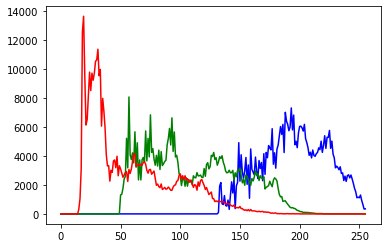

In [4]:
img_array = cv2.imread('data_test/blueSky.webp')
image_hsv = cv2.cvtColor(img_array, 3)
#plt.imshow(image_hsv)


hists = get_rgb_histograms(image_hsv)

for i,col in enumerate(color):
    plt.plot(hists[i],color=col)


In [5]:

images = []
flat_data = []
target = []
#images to be classified as:
# labesls : Mer= 0 and Ailleurs = 1
categories = ["Mer","Ailleurs"]
blue_means = []
green_means = []
red_means = []

for c in categories:
    print("categorie is : ",c,"\t label is ", categories.index(c))
    target_class = categories.index(c)
    images_path = os.path.join("./Data",c)
    for img in os.listdir(images_path):
        image = cv2.imread(os.path.join(images_path, img))  
        img = cv2.cvtColor(image, 3)
        resized_image = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA)
        images.append(resized_image)
        means = cal_mean_colors(resized_image)
        datas  = np.concatenate([get_rgb_histograms(resized_image).flatten(),resized_image.flatten()])   
        flat_data.append(datas.flatten())
        blue_means.append(means[0][0])
        green_means.append(means[0][1])
        red_means.append(means[0][2])
        target.append(target_class)

flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)

df2 = pd.DataFrame(flat_data)
df2['Class'] = target

x = df2.iloc[:,:-1].values
y = target




categorie is :  Mer 	 label is  0
categorie is :  Ailleurs 	 label is  1


In [6]:
print ("moyenne des bleus des images de Data : ",np.mean(blue_means))
print ("moyenne des verts des images de Data : ",np.mean(green_means))
print ("moyenne des rouges des images de Data : ",np.mean(red_means))

moyenne des bleus des images de Data :  135.0887953163921
moyenne des verts des images de Data :  131.85944985652316
moyenne des rouges des images de Data :  117.679042134308


In [7]:
print("Input data dimensions:",x.shape)
print("Output data dimensions:",y.shape)

classifieur = RandomForestClassifier(n_estimators = 500,criterion='entropy',bootstrap=True,n_jobs=-1,warm_start=True)


# Stratify ensures every image is divided in equal proportions (no bias)
def baseline(state):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size = 0.3,random_state=state,stratify=y)  
   
    classifieur.fit(x_train,y_train)
    classifieur.n_estimators += 1; 
    y_predits = classifieur.predict(x_test)
    return x_train,x_test,y_train,y_test,accuracy_score(y_test,y_predits)


Input data dimensions: (414, 197376)
Output data dimensions: (414,)


In [8]:
for i in range(1,10):
    x_train,x_test,y_train,y_test,accuracy= baseline(i)
    f = open('scoresRForestsTemp.txt','a+')
    f.write(str(accuracy)+"\n")

In [9]:
df2

,0,1,2,3,4,5,6,7,8,9,...,197367,197368,197369,197370,197371,197372,197373,197374,197375,Class
0,7.0,9.0,9.0,5.0,10.0,8.0,14.0,23.0,15.0,26.0,...,150,145,114,107,104,67,145,143,105,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,16,42,0,16,42,0,16,42,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,141,120,87,115,92,60,151,127,88,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,55,94,7,58,94,8,63,101,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,60,64,59,59,63,57,58,62,57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,140.0,134.0,163.0,179.0,217.0,265.0,282.0,328.0,349.0,369.0,...,37,42,10,37,42,10,37,42,10,1
410,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,...,33,21,42,32,20,40,29,18,36,1
411,3.0,2.0,1.0,3.0,0.0,1.0,2.0,6.0,6.0,2.0,...,128,101,73,120,93,63,136,109,79,1
412,4.0,24.0,62.0,74.0,122.0,169.0,193.0,251.0,312.0,305.0,...,73,108,29,83,119,37,86,121,44,1


In [20]:
f = open("scoresRForestsTemp.txt", "r")
listItems = f.read().splitlines()
scores = [float(i) for i in listItems]
standard_deviation = np.std(scores)
print("l'écart type est  : ",standard_deviation)
print("La moyenne des scores est  : ",np.mean(scores))

[False, False, False, False, False, False, False, False, False]
l'écart type est  :  0.0
La moyenne des scores est  :  0.0


### Rapport de Classification 

In [11]:
#classification report
from sklearn.metrics import classification_report
x_train,x_test,y_train,y_test,accuracy= baseline(4)
y_true= y_test
y_predits = classifieur.predict(x_test)
y_predicted = y_predits
target_names = ["Mer: '0' ", "Ailleurs: '1'"]
print(classification_report(y_true, y_predicted, target_names= target_names))

               precision    recall  f1-score   support

    Mer: '0'        0.97      0.95      0.96        63
Ailleurs: '1'       0.95      0.97      0.96        62

     accuracy                           0.96       125
    macro avg       0.96      0.96      0.96       125
 weighted avg       0.96      0.96      0.96       125



### Sauvegarde du model en utilisant 'pickle'

In [12]:
import pickle

classifieur_final = RandomForestClassifier(n_estimators = 507,criterion='entropy',bootstrap=True,n_jobs=-1,warm_start=True)


x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size = None,random_state=7,stratify=y)  
classifieur_final.fit(x_train,y_train)

#return x_train,x_test,y_train,y_test,accuracy_score(y_test,y_predits)


pickle.dump(classifieur_final, open("image_classifier_scoresRForestsTemp.py","wb"))


In [13]:
import pickle
test_model_scoresRForestsTemp = pickle.load(open("image_classifier_scoresRForestsTemp.py","rb"))

### testing a new image : not in out data set

Prediction : Ailleurs


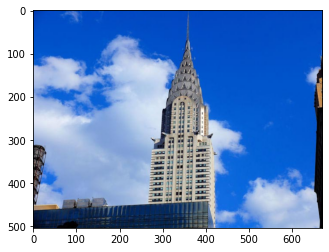

In [17]:
flat_data = []
img_array = plt.imread('data_test/building.jpeg')
img =  cv2.cvtColor(image, 3)
# Resize image
img_resized = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA)
#flat_data.append(get_rgb_histograms(img_resized).flatten())
datas  = np.concatenate([get_rgb_histograms(img_resized).flatten(),img_resized.flatten()])   
flat_data.append(datas.flatten())

flat_data = np.array(flat_data)
plt.imshow(img_array)

#print("data = ",flat_data)

y_output = test_model_scoresRForestsTemp.predict(flat_data)
y_output = categories[y_output[0]]

print("Prediction :",y_output)

In [18]:

def predict_image(filename):
    flat_data = []
    img_array = cv2.imread('AllTest/'+str(filename)) 
    # Resize image
    img =  cv2.cvtColor(img_array, 3)
    img_resized = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA)
    #flat_data.append(get_rgb_histograms(img_resized).flatten())
    #flat_data = np.array(flat_data)
    datas  = np.concatenate([get_rgb_histograms(img_resized).flatten(),img_resized.flatten()])   
    flat_data.append(datas.flatten())
   
    y_output = test_model_scoresRForestsTemp.predict(flat_data)
    return y_output[0]



In [19]:

files_array = os.listdir("AllTest")[0:]

def compute_labels(rep):
    labels = []
   # dico_labels = {}
    for filename in rep:
        # Mer
        y = 0
        if (int(filename[0]) == 0):
            # Ailleurs
            y = 1
        labels.append(y)
        #dico_labels[filename] = y
    return(np.array(labels))
    #return(dico_labels)

 
y_test = compute_labels(files_array)
y_out = []

for filename in files_array:
    y_out.append(predict_image(filename))


y_out = np.array(y_out)

print("Vrais classes ")
print(y_test)

print("classes prédites : ")
print(y_out)


print("taux de bonne classification : ")
print(accuracy_score(y_test,y_out))

 

Vrais classes 
[1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1
 0 1 1 1 1 1 1 1]
classes prédites : 
[1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1
 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1
 0 1 0 1 0 0 1 1]
taux de bonne classification : 
0.7560975609756098
